In [11]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [12]:
def cal_RG(piexl_mean):
    RG_lst = []
    RG_lst.append(piexl_mean[2]/sum(piexl_mean))
    RG_lst.append(piexl_mean[1]/sum(piexl_mean))
    return RG_lst

In [44]:
def get_pixel(img_root):
    lst_R = []
    lst_G = []
    img = cv.imread(img_root)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if all(set(img[i, j, :])):
                RG_lst = cal_RG(list(img[i, j, :]))
                lst_R.append(RG_lst[0])
                lst_G.append(RG_lst[1])
    return lst_R, lst_G

In [45]:
img_root = r'D:\MyCodes\pythonProject\coated_tongue_color\datas\data3\category\3\20220510145206-1.png'

In [46]:
lst_R, lst_G = get_pixel(img_root)

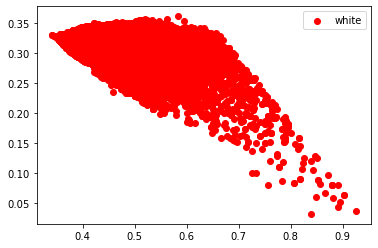

In [47]:
plt.scatter(lst_R,lst_G,marker="o",color='red',label="white")
# plt.scatter(list_x[1],list_y[1],marker="o",color='cyan',label="lightyellow")
# plt.scatter(list_x[2],list_y[2],marker="o",color='blue',label="yellow")
# plt.scatter(list_x[3],list_y[3],marker="o",color='goldenrod',label="brown")
# plt.scatter(list_x[4],list_y[4],marker="o",color='black',label="darkgray")
# fig = plt.figure()
# axes = fig.add_axes([0,0,1,1])
# axes.set_xlabel('R/(R+G+B)')
# axes.set_ylabel('G/(R+G+B)')
plt.legend()
plt.show()

In [24]:
img = cv.imread(img_root)

In [43]:
if  all(set([1, 1,1])):
    print(True)

True


In [48]:
def getFootPoint(point, line_p1=[0.28, 0.35], line_p2=[0.32, 0.44]):
    """
    求点到直线的垂足
    @point, line_p1, line_p2 : [x, y, z]
    """
    x0 = point[0]
    y0 = point[1]
    z0 = 0

    x1 = line_p1[0]
    y1 = line_p1[1]
    z1 = 0

    x2 = line_p2[0]
    y2 = line_p2[1]
    z2 = 0

    k = -((x1 - x0) * (x2 - x1) + (y1 - y0) * (y2 - y1) + (z1 - z0) * (z2 - z1)) / \
        ((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)*1.0

    xn = k * (x2 - x1) + x1
    yn = k * (y2 - y1) + y1
    # zn = k * (z2 - z1) + z1

    return [xn, yn]